# Ejecución del modelo de demanda GDL

### 1) Generación y atracción de viajes

In [1]:
#NOTA: En este caso solo haremos una lectura y visualización de los viajes generados ya que ya se cuenta
# con la matriz de generación y atración de viajes

import geopandas as gpd
import pandas as pd

In [1]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

sys.path.insert(0, r'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Quetzal Dev/quetzal-master')

from quetzal.model import stepmodel
import numpy as np

SQLalchemy is not installed. No support for SQL output.


In [3]:
training_folder ='C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/'

##### 1.1) Lectura del SM

In [4]:
sm = stepmodel.read_zip(training_folder + 'model/base/aon_pathfinder.zip'.format(scen=scenario))

zones: 100%|██████████| 29/29 [00:17<00:00,  1.63it/s]                    


##### 1.2) Lecture de la zonificación de viajes atraidos y generados

In [5]:
Matriz_OD = pd.read_csv('C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Data/inputs/data/OD2007.csv', encoding='latin', sep=';')
## Renombramiento de columnas
Matriz_OD.rename(columns={'ï»¿Origen': 'Origen'}, inplace=True)

# Visualizacion de los nombres de las columas
list(Matriz_OD.columns)


['Origen',
 'Destino',
 'Caminando',
 'Transporte Colectivo',
 'Taxi',
 'Bicicleta',
 'Motocicleta',
 'Auto (Conductor)',
 'Auto (Pasajero)',
 'Camioneta (Conductor)',
 'Camioneta (Pasajero)',
 'Otros',
 'Total']

##### Viajes totales del DF tomando como referencia que estos datos corresponden al estudio de 2014

In [ ]:
Matriz_OD.Total.sum()

##### Población total al momento del estudio (2014)

In [ ]:
POB2014=4636514
print(POB2014)


##### Viajes al día  por persona

In [ ]:
Viajes_per_capita= Matriz_OD.Total.sum() / POB2014
print(Viajes_per_capita)


##### Agrupamiento de total de viajes generados por zona

In [ ]:
Generados = Matriz_OD.groupby(['Origen'])['Total'].sum()
Generados= Generados.to_frame() # Lo convertimos a DF porque lo genera orignalmente como serie
Generados['ID_2'] = Generados.index # Le damos la columna
Generados.head(4)

##### Agrupamiento del total de viajes atraidos por zona

In [ ]:
Atraidos = Matriz_OD.groupby(['Destino'])['Total'].sum()
Atraidos= Atraidos.to_frame() # Lo convertimos a DF porque lo genera orignalmente como serie
Atraidos['ID_2'] = Atraidos.index # Le damos la columna
Atraidos.head(4)


##### Lectura del layer de Zonificación


In [ ]:
zones = gpd.read_file(r'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/inputs/zones/Zonificacion.shp')

##### Vinculación de viajes totales atraidos y generados con el GEO DF de la zonificación de estudio

In [ ]:
# Merging DF con un GEODF de los viajes generados
zones = zones.merge(Generados, on='ID_2') # el primer elemento es el espacial

#Renombre
zones.rename(columns={'Total': 'Total_Generados'}, inplace=True)

### NOTA: EL merge lo hace bien pero no coiciden del todo los datos de generación con los que tiene
#el archivo de zonificacion (zonas)     VERLO CON EL IMEPLAN
#Info: https://geopandas.org/docs/user_guide/mergingdata.html

In [ ]:
# Merge con el GEO DATA FRAME con el DF cde los viajes atraidos
zones = zones.merge(Atraidos, on='ID_2') # el primer elemento es el espacial

#Renombre
zones.rename(columns={'Total': 'Total_Atraidos'}, inplace=True)

##### Eliminación de columnas inecesarias

In [ ]:
del zones ["POB2005"]
del zones ["POB2000"]
del zones ["VIAJES_AUT"]
del zones ["VIAJES_TP"]
del zones ["Viaje_tot"]
del zones ["trip_perso"]

##### Visualiuzación de viajes generados por zona

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
zones.plot(column= 'Total_Generados',ax=ax, legend=True)

##### Visualización de viajes atraidos por zona

In [ ]:
fig, ax = plt.subplots(1, 1)
zones.plot(column= 'Total_Atraidos',ax=ax, legend=True)


##### Exportación de los DF de viajes atraidos y generados


In [ ]:
##### Union de ambos DF en uno solo
Viajes_totales = pd.merge(Generados,Atraidos, on="ID_2")

# Cambio de nombre de las columnas
Viajes_totales = Viajes_totales.rename(columns={'Total_x': 'Generados', 'Total_y': 'Atraidos'})


In [ ]:
print(Viajes_totales)


In [ ]:
Viajes_totales.to_csv(r'C:/Users/orlan/Desktop/Resultados preliminales del modelo de demanda\Viajes totales.csv', index = False)


### 2) Distribución
###### Solo se tomara los viajes generados y atraidos en hora punta

In [ ]:
### RECORDAR, leer el SM que ahora contiene :
# zonificacion (contiene goemetria, ID de poligonos, viajes generados y atriados, pobacion)
# road_links y road_nodos viales
# links y nodes de TP ya vinculados a las vialidades
# lines
# car_los que son los tiempos de viaje en auto
# pt_los que son los tiempos de viaje en TP

##### El modelo de distribución se basa en método gravitatorio. Recordar que el modelo gravitatorio toma como referencia la matriz de impedancia que está constituida normalmente por el tiempo o el costo de cada viaje

In [1]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

sys.path.insert(0, r'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Quetzal Dev/quetzal-master')

from quetzal.model import stepmodel
import numpy as np
import pandas as pd

training_folder ='C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/'

SQLalchemy is not installed. No support for SQL output.


In [2]:
sm = stepmodel.read_zip(training_folder + 'model/base/aon_pathfinder.zip'.format(scen=scenario))

zones: 100%|██████████| 29/29 [00:19<00:00,  1.51it/s]                    


In [3]:
##### Generar columnas igual al indice que  es lo que contiene el nombre de las zonas
sm.zones['index'] = sm.zones.index

In [ ]:
# Exportacion
sm.zones.to_file('C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/zones.shp', driver='ESRI Shapefile')


##### Tiempos medios de desplazamiento en auto

In [4]:
sm.car_los["time"].mean() /60   # /60 para pasarlo a minutos

37.58710210745968

##### Tiempos medios de desplazamiento en Transporte público

In [5]:
sm.pt_los ["gtime"].mean()/60  # Da 57 minutos

57.090646312835155

##### Media de transferencia en Transporte público

In [6]:
sm.pt_los ["ntransfers"].mean() # esto realmente esta mal, o es irrealista

7.904207989126973

##### Visualización de viajes TOTALES generados y atraidos a lo largo del día

In [7]:
sm.zones.Total_Atraidos.sum()  # ATRAIDOS, 9 millones

9904182

In [8]:
sm.zones.Total_Generados.sum()   # GENERADOS, 9 millones

9903180

##### Modificacion para viajes en hora pico (se toma el 10 % de los viajes totales)

In [9]:
### AQUI para seguir con la misma nomenclatura del codigo se hará lo siguiente, se crea 2 nuevas columnas emissions y atraction (generados y atraidos)
sm.zones['emission'] =  sm.zones['Total_Generados'].astype(int) / 10  # POR ESO esta division, para representar la hora pico
sm.zones['attraction'] =  sm.zones['Total_Atraidos'].astype(int) / 10


##### 2.2) Viajes totales en auto

In [10]:
### Primero se asigna un grado de motorización general
motor_rate = 0.35  # 35 % de grado de motorizacion
car = sm.copy()  # se hace una copia del sm que contiene el TOTAL de viajes generados y atraidos en hora pico

# IMPORTANTE: Aqui se hace esta asumsión que influirá mucho en la distribución modal,
# se integra el grado de motorización y se asumne que las personas que tienen auto lo van a utilizar de manera mucho más frecuente que las que no.
# Esto se puede dejar con este método, o se puede integrar el grado de motorización por zona, o no incluir ningun grado de motorización y seguir con el modelo de los 4 pasos de manera clásica

##### Se multiplica el total de viajes por zona por el grado de motorizacion que se tiene

In [11]:
car.zones['emission'] *= motor_rate

##### 2.3)  Matriz de impedancia en autos

In [12]:
## IMPORTANTE: aqui se extrae la matriz de tiempos de desplazamiento de zona a zona. Estos datos ya  los contiene el SM  "car"
# dentro del DF de "car_los", al final esta es la matriz de  impedancia (generadas en el codigo "all_or_nothing_patfinder", el DF de car_los)
# REVISAR: En donde se generó la matriz de "car_los"

imp_matrix_car = car.car_los[
    ['origin', 'destination', 'time']
].set_index(['origin','destination']).unstack()

imp_matrix_car = imp_matrix_car.replace(0, 120)


##### 2.4) Ejecución del modelo gravitatorio

##### Ejecución de la función de distribución de volumenes de viajes (aplicada a autos)
###### La funcion step_distribution es la que contiene el modelo gravitatorio, esta funcion toma como input la matriz de impedancia (matriz de tiempos de viaje OD) y genera la distribución de volumenes de viaje. Las unidades de volumes son PERSONAS

##### Distribución de viaje en auto


In [13]:
### Ditribucion de viajes basado en modelo gravitatorio
car.step_distribution(deterrence_matrix=imp_matrix_car)

## Se crea el DF "volumes"

##### Visualización de la distribución de volumenes de viaje en auto

In [14]:
car.volumes

,origin,destination,volume
0,zone_0,zone_0,0.004131
1,zone_0,zone_1,0.002615
2,zone_0,zone_2,0.242071
3,zone_0,zone_3,0.032596
4,zone_0,zone_4,0.061390
...,...,...,...
188351,zone_433,zone_429,0.345618
188352,zone_433,zone_430,0.296179
188353,zone_433,zone_431,0.223152
188354,zone_433,zone_432,0.258303


##### Viajes totales en auto en hora pico

In [15]:
car.volumes.volume.sum()

346611.3

#####  Viajes totales en TP

In [16]:
## En este caso se simplifica y se dice que será la diferencia al % de autos ya establecido (es decir que el resto de los viaje que no se hace en auto se hacen en TP)
pt = sm.copy()
pt.zones['emission'] *= (1-motor_rate)

##### 2.5) Matriz de impedancia en TP

In [17]:
imp_matrix_pt = pt.pt_los[
    ['origin', 'destination', 'gtime']
].set_index(['origin','destination']).unstack()
imp_matrix_pt = imp_matrix_pt.replace(0, 120)


##### Ejecución de la función de distribución de volumenes de viajes (aplicada a TP)

In [18]:
pt.step_distribution(deterrence_matrix=imp_matrix_pt)

##### Visualización de la distribución de volumenes de viaje para TP


In [19]:
pt.volumes

,origin,destination,volume
0,zone_0,zone_0,0.005632
1,zone_0,zone_1,0.009078
2,zone_0,zone_2,0.401442
3,zone_0,zone_3,0.073305
4,zone_0,zone_4,0.143701
...,...,...,...
188351,zone_433,zone_429,1.183654
188352,zone_433,zone_430,0.756884
188353,zone_433,zone_431,0.784890
188354,zone_433,zone_432,0.597552


##### Total de viajes en TP en hora pico

In [20]:
pt.volumes.volume.sum()

643706.7000000001

##### 2.6) Combinación de los DF en un mismo SM

In [21]:
sm.volumes = pd.merge(
    car.volumes,
    pt.volumes,
    on=['origin', 'destination'],
    suffixes=[ '_car_owner', '_pt_captive']
).rename(columns={'volume_car_owner': 'car_owner', 'volume_pt_captive': 'pt_captive'})


In [22]:
###  Aqui sumare las de auto y TP para crear una sola columna de total de viajes por zona

sm.volumes["trips"] = sm.volumes.car_owner + sm.volumes.pt_captive

##### Visualización de volumenes

In [23]:
sm.volumes

,origin,destination,car_owner,pt_captive,trips
0,zone_0,zone_0,0.004131,0.005632,0.009762
1,zone_0,zone_1,0.002615,0.009078,0.011693
2,zone_0,zone_2,0.242071,0.401442,0.643513
3,zone_0,zone_3,0.032596,0.073305,0.105902
4,zone_0,zone_4,0.061390,0.143701,0.205091
...,...,...,...,...,...
188351,zone_433,zone_429,0.345618,1.183654,1.529272
188352,zone_433,zone_430,0.296179,0.756884,1.053063
188353,zone_433,zone_431,0.223152,0.784890,1.008042
188354,zone_433,zone_432,0.258303,0.597552,0.855855


##### Sumatoria de viajes totales del DF de volumes


In [24]:
sm.volumes.car_owner.sum() + sm.volumes.pt_captive.sum()

990318.0

##### Exportaciones SM, matriz de impedancia y distribución de viajes

In [ ]:
##### Exportación del SM
sm.to_zip(
    training_folder + 'model/base/distribution.zip'.format(scen=scenario),
    only_attributes=['volumes', 'epsg', 'coordinates_unit']
)

In [25]:
##### Exportacion de la matriz de  impedancia
# Matriz de impedancia del auto
imp_matrix_car.to_csv(r'C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/matriz_impedancia_car.csv', index = True)

# Matriz de impedancia del TP
imp_matrix_pt.to_csv(r'C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/matriz_impedancia_pt.csv', index = True)

In [29]:
### Exportación de la distribución de viajes final "volumens" (la cual está interna en el SM)
sm.volumes.to_excel(r'C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/distribucion_vol.xlsx', index = True)

##### 2.7) Visualización de los resultados de tiempos de desplazamiento (en segundos)

Text(0.5,1,'Car distribution')

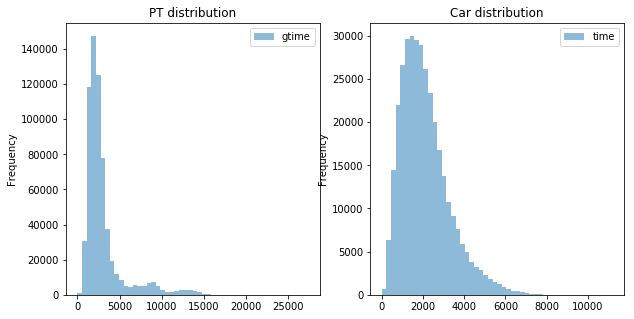

In [26]:
od = pd.merge(sm.volumes, sm.pt_los, on=['origin', 'destination'])
od = pd.merge(od, sm.car_los, on=['origin', 'destination'])

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=[10, 5])

plot = od[['gtime']].plot(kind='hist', weights=od['pt_captive'], bins=50, alpha=0.5, ax=axes[0])
plot.set_title('PT distribution')

plot = od[['time']].plot(kind='hist', weights=od['car_owner'], bins=50, alpha=0.5, ax=axes[1])
plot.set_title('Car distribution')

### 3) Road pathfinder
#### Probar este codigo en una copia y eliminar totalmente  esta secccion.

###### El código de pathfinder esta vinculado a la afectación del tráfico por los volumenes de flujo que se tienene en los links viales  ¿ y para TP?

In [ ]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])
import numpy as np

In [ ]:
sys.path.insert(0, r'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Quetzal Dev/quetzal-master')
from quetzal.model import stepmodel
import pandas as pd

In [ ]:
training_folder ='C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/'


##### 3.1) Lectura del SM aon_pathfinder  y ditribution
###### Recordemos que el SM "aonpatfinder" es el que integró los tiempos de desplazamiento de cada par OD (en car_los  y en pt_los, pero el otro SM tambien los tiene)  . Mientras que el SM "distribution" contiene la matriz de disrtribución de viajes generado por el modelo gravitatorio  (seccion 2 del codigo) en el DF de "volumnes"

In [ ]:
road = stepmodel.read_zip(training_folder + r'model/{scen}/aon_pathfinder.zip'.format(scen=scenario))
distribution = stepmodel.read_zip(training_folder + r'model/{scen}/distribution.zip'.format(scen=scenario))

##### 3.2) Generación de un solo SM con los datos de tiempos de desplazamiento y volumenes de viajes para cada OD
###### Estos SM (road y distribution) aparetementemnente solo tienen la diferencia del que road tiene el DF de footpaths, todo lo demás apratmente tienen el mismo contenido

In [ ]:
sm = road.copy()
sm.volumes = distribution.volumes

##### 3.3) Dar capacidades máximas de flujo a las vialidades
###### Esto se puede mejorar si en la etapa de "Data preparation" es posible dejar el tipo de vialidad de cada link y a cada tipo de vialidad asignarle capacidades diferenciadas

In [ ]:
##### SIMPLIFICACION DE LAS CAPACIDADES DE LOS LINKS viales
### En este caso se esta simplificando y se deja que todas tendrán una capacidad de 2,000
sm.road_links['capacity'] = 2000

##### Creación de la columna "volumne_car" que es igual a la "car_owener"
###### Ya anteriormente había apuntado a que ese nombre de la columna (car_owner) que tiene los datos de volumene me parecía inadecuado, ahora lo está modificando

In [ ]:
### Aqui simplemente hauy un cambio de nomenclatura (que debio ser asi desde el inicio)

# 'volume_car' is used for road pathfinder
sm.volumes['volume_car'] = sm.volumes['car_owner']
sm.road_links  # esto es inencesario


## Este codigo es el de asginacion, de tráfico , es parte o todo el ultima etapa, esta en mi opinion mal colocado aqui

In [ ]:
 ###############   AQUI, creo que abajo se comenzará a hacer el all or nothing y el de ewquilibrio de wardrop

In [ ]:
### COPIAS DEL SM
constrained = sm.copy()
free = sm.copy()


In [ ]:
#   ¿¿¿  Qué hace está función????
constrained.step_road_pathfinder(maxiters=5, log=True, speedup=True, tolerance=0.01)
#### HECHO: Esto genera un chingo de columnas nuevas en el DF de car_los
### VER lo que le hace al DF de Road_links

##### Esto ¡APARETMENETE! es el codigo asociado al equilibrium de Wardrop.

In [ ]:
#### Nuevamente uso de la función  "step_road_pathfinder"  CON UNA TORELANCIA MENOR
free.step_road_pathfinder(maxiters=1, log=True, speedup=False, tolerance=0.001)


##### 3.4) Exportación del SM con "contrianed" vialidades

###### HAY QUE SOLUCIONAR UN PROBLEMA DE TAMAÑO DE LA BASE DE DATOS O ALGO SIMILAR:
###### https://es.stackoverflow.com/questions/355497/python-int-too-large-to-convert-to-c-long-al-intentar-hacer-un-update-en-mysq

In [ ]:

#######################    POR LO PRONTO,  NO LO VAMOS A EXPORTAR, SEGUIREMOS CON ESTE SM nuevo internamente en Python para usar en el proximo codigo diractamente desde aqui


constrained.to_zip(training_folder + 'model/base/constrained_road_pathfinder.zip'.format(scen=scenario))

### DA UN ERROR POR EL VOLUMEN  Y TAMAÑO DEL ARCHIVO

In [ ]:
#################  Intento de solucionar el problema de la exportacion
# Creo que: # este error tiene que ver con la cantidad de numeros enteros que contiene este objeto, aparetement los numeros enteros (int) consumen una
# mayor memoria, hay que pasarlos a float.

sys.maxsize

constrained = np.zeros((1, 3))

constrained.to_zip(training_folder + 'model/base/constrained_road_pathfinder.zip'.format(scen=scenario))

##### 3.5) Visualización de las restricciones viales por volumenes

In [ ]:
### SE pasa a un DF
road_links_constrained = constrained.road_links
road_links_free = free.road_links

In [ ]:
###### Modificacion , hacerlo más pro. Con barra titulo, fondo ETC
road_links_constrained.plot(column='flow',legend=True);

In [ ]:
road_links_free.plot(column='flow',legend=True);


### 4) Modelo Nested Logit (distribución modal) aplicado a GDL

In [27]:
import sys # for automation and parallelization
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

import sys
sys.path.insert(0, r'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Quetzal Dev/quetzal-master')

from quetzal.model import stepmodel
from quetzal.io import excel
import pandas as pd
if manual:
    %matplotlib inline

training_folder ='C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/'

from syspy.skims import skims
import geopandas as gpd

##### Lectura de los SM

In [28]:
distribution_gdl = stepmodel.read_zip('C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/model/base/distribution.zip'.format(scen=scenario))
pt_gdl = stepmodel.read_zip(training_folder + 'model/base/pruning_pt_pathfinder.zip'.format(scen=scenario))
sm_gdl = stepmodel.read_zip(training_folder + 'model/base/aon_pathfinder.zip'.format(scen=scenario))

# NOTAS: El SM de distribution contiene el DF de "volumes" el cual es el output del paso 2 que es trip distribution generaado a partir del modelo gravitatorio
# el SM del archivo llamdo aon_patfinder ya contiene los car_los, pt_ los y netwokcaster

zones: 100%|██████████| 29/29 [00:17<00:00,  1.65it/s]                    


##### Unir los pt_los, car_los y networkcaster que estan en el SM "sm" con el SM de "distribution" dado que ese contiene el DF de  volumenes

In [30]:
sm_gdl.volumes = distribution_gdl.volumes
sm_gdl.pt_los = pt_gdl.pt_los

In [31]:
# each segment will be processed independently in the logit
sm_gdl.segments = ['car_owner', 'pt_captive']

# se crea este serie que contiene los segmentos  de distribucion modal

##### Lectura de las variables relacionadas a la operación de las modalidades (costos, etc)

In [32]:
var= excel.read_var( file= 'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Data/inputs/parameters_gdl_paris.xlsx')
var.head()

########## IMPORTANTE, en este caso estamos leyendo las mismas que se aplicaron a PARIS porque no entiendo  muy bien las unidades y lo que expresan cada una, entonces dejaramos las mismas de PAris por lo pronto hasta que pueda reslver esta duda con Quentin

category  parameter        
general   parent               base
          bus_speed_factor      0.8
          boarding_cost_acf     300
          boarding_cost_wor     300
          routes_code          base
Name: base, dtype: object

In [33]:
kwargs = var['preparation_logit'].to_dict()
kwargs


{'time': -0.00055,
 'price': -1,
 'transfers': -0.25,
 'mode': 1,
 'pt_mode': 0.5,
 'pt_path': 0.1}

### Preperación para el modelo Nested Logit
###### IMPORATNTE: A continuacion agrega varios DF al  SM como lo son: "ulity values" el cual capta ciertos datos que estan en el excel de parameters. No estoy 100 % seguro que represetan. Creo que tambien se agrega otro DF llamado "logit scales", "mode utility" y "mode_nestests" en este se dan de alta los nidos del modelo Nested logit

In [34]:
######## Funcion "Prepration_logit"
sm_gdl.preparation_logit(
    segments=['car_owner', 'pt_captive'],
    **kwargs
)

##### Visualización de los nuevos DF

In [35]:
sm_gdl.utility_values.T

value,time,price,ntransfers,mode_utility
segment,,,,
root,-0.00055,-1.0,-0.25,1.0
car_owner,-0.00055,-1.0,-0.25,1.0
pt_captive,-0.00055,-1.0,-0.25,1.0


In [36]:
sm_gdl.logit_scales.T

route_type,root,car,walk,bus,pt
segment,,,,,
root,1.0,0.0,0.0,0.1,0.5
car_owner,1.0,0.0,0.0,0.1,0.5
pt_captive,1.0,0.0,0.0,0.1,0.5


In [37]:
sm_gdl.mode_nests.T # nested structure can be set for each segment

route_type,root,car,walk,bus,pt
segment,,,,,
root,NaN,root,root,pt,root
car_owner,NaN,root,root,pt,root
pt_captive,NaN,root,root,pt,root


In [38]:
sm_gdl.mode_utility.T

route_type,root,car,walk,bus
segment,,,,
root,0,0,0,0
car_owner,0,0,0,0
pt_captive,0,0,0,0


In [39]:
### Aqui hace una modificacion a los valores en el DF de "mode utility"
sm_gdl.mode_utility.loc[ 'car', 'pt_captive'] = -100 # aqui a la fraccion de las persona que solo pueden usar TP (captivos TP) se le asgina una utlidad al auto muy mala (-100) esto hará que dentro del modelo logit esa fraccion de las personas tengan una muy baja predisposición a usar el auto
sm_gdl.mode_utility.T


route_type,root,car,walk,bus
segment,,,,
root,0,0,0,0
car_owner,0,0,0,0
pt_captive,0,-100,0,0


### Evaluación de la utilidad

In [40]:
#### Agrega varias nuevas columnas a los DF de pt_los y car_los, aque les da valores de 0

sm_gdl.pt_los['ntransfers'] = sm_gdl.pt_los['alighting_links'].apply(lambda x: max(len(x)-1, 0))   ## Este es redudandate porque el pt_los ya contiene esta columna con los mismos valores
sm_gdl.pt_los['price'] = 0 # sm.analysis_pt_fare
sm_gdl.car_los['ntransfers'] = 0
sm_gdl.car_los['price'] = 0

### IMPORTANTE: Cálculo de la utilidad
###### Esto realmente no hace el calculo de la utilidad, más bien genera columnas de etqapas de tiempo en el viaje (waiting time, acces time, time in vehile)

In [41]:
# sm_gdl.pt_los['time'] = sm_gdl.pt_los['gtime'] # creo que no es necesario

### IMPORANTE: Esto genera 10 nuevas columnas en el pt_los vinculadas a tiempos y distancia (access_length, footpath_length, length, acces time, footpath_time, in vehicle time, waiting time, y time)
sm_gdl.analysis_pt_time(walk_on_road=True) #############   IMPORTANTISMO, el walk_on_road= true

In [42]:
# builds 'route_type' in pt_los based on 'route_types'
sm_gdl.analysis_pt_route_type(hierarchy=[ 'car','bus', 'walk'])
sm_gdl.analysis_car_route_type() # add route_type = 'car' in car_los

##### Creación del DF LOS, "LOS" contiene todos los viajes OD possibles bajo todas las modalidades y contiene la concatenacion de links (los links utilzados para ese viaje)

In [43]:
# VER bien esto.
# concatenate pt_los and car_los (uno de los PT_los y el car_los en uno solo que es LOS)
sm_gdl.los = pd.concat([sm_gdl.pt_los, sm_gdl.car_los]).reset_index(drop=True)
sm_gdl.los['path'] = sm_gdl.los['path'].apply(lambda p: tuple(p))

# CREA UN NUEVO DF: llamado Los que contien la combinacion de pt_los y car_los

###### Generación de los valores de utilidad para cada viaje para todas las modalidades

In [44]:
# Genera columnas de utilidad para cada modalidad en el DF de LOS
sm_gdl.analysis_mode_utility()

100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


In [45]:
sm_gdl.los.head(3)

,origin,destination,gtime,path,reversed,pathfinder_session,broken_modes,boardings,alightings,node_path,...,footpath_time,in_vehicle_time,waiting_time,boarding_time,time,route_types,route_type,mode_utility,"(car_owner, utility)","(pt_captive, utility)"
0,zone_0,zone_0,0.000000,"(zone_0,)",False,mode_breaker,{bus},[],[],[],...,0.000000,0.0,0.0,0.0,0.000000,(),walk,0,0.000000,0.000000
1,zone_0,zone_1,1524.280407,"(zone_0, 4738717039, 4738717043, 4738717041, 4...",False,mode_breaker,{bus},[],[],"[4738717039, 4738717043, 4738717041, 473871703...",...,1196.048271,0.0,0.0,0.0,1367.990563,(),walk,0,-0.752395,-0.752395
2,zone_0,zone_10,13196.533922,"(zone_0, 4738717034, 4738717037, 4738717022, 4...",False,mode_breaker,{bus},[],[],"[4738717034, 4738717037, 4738717022, 473871642...",...,11045.291148,0.0,0.0,0.0,13009.587489,(),walk,0,-7.155273,-7.155273


##### Generación del DF de utilidades y probab ilidad

In [46]:
sm_gdl.initialize_logit()
sm_gdl.step_logit(nchunks=5)

# sm_gdl.step_logit(keep_od_tables=True)  ANTERIOR
### SE GENERA, LA MATRIZ DE UTILIDAD. en el DF llamado utilities.
## tambien se genera el  DF de PROBABILITIES.

100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


In [47]:
###### Generación de una matriz mejor estructurada
sm_gdl.od_probabilities = sm_gdl.probabilities.set_index(
    ['origin', 'destination', 'segment']
).unstack('segment').swaplevel(axis='columns')

sm_gdl.od_utilities = sm_gdl.utilities.set_index(
    ['origin', 'destination', 'segment']
).unstack('segment').swaplevel(axis='columns')


##### Visualización de la matriz de probabilidades

In [48]:
sm_gdl.od_probabilities

segment             car_owner pt_captive car_owner pt_captive car_owner  \
route_type               root       root      walk       walk       car   
origin  destination                                                       
zone_0  zone_0              1          1  0.500000   1.000000  0.500000   
        zone_1              1          1  0.391394   1.000000  0.608606   
        zone_10             1          1  0.008507   0.275264  0.969096   
        zone_100            1          1  0.140421   0.503434  0.721074   
        zone_101            1          1  0.146917   0.415731  0.646605   
...                       ...        ...       ...        ...       ...   
zone_99 zone_95             1          1  0.418832   1.000000  0.581168   
        zone_96             1          1  0.273882   0.546817  0.499133   
        zone_97             1          1  0.302679   0.537401  0.436772   
        zone_98             1          1  0.235424   0.444924  0.470866   
        zone_99             1          1  0.500000   1.000000  0.500000   

segment                pt_captive car_owner pt_captive car_owner pt_captive  
route_type                    car        pt         pt       bus        bus  
origin  destination                                                          
zone_0  zone_0       3.720076e-44  0.000000   0.000000  0.000000   0.000000  
        zone_1       5.784598e-44  0.000000   0.000000  0.000000   0.000000  
        zone_10      1.166554e-42  0.022397   0.724736  0.022397   0.724736  
        zone_100     9.617049e-44  0.138505   0.496566  0.138505   0.496566  
        zone_101     6.806612e-44  0.206478   0.584269  0.206478   0.584269  
...                           ...       ...        ...       ...        ...  
zone_99 zone_95      5.161956e-44  0.000000   0.000000  0.000000   0.000000  
        zone_96      3.707195e-44  0.226985   0.453183  0.226985   0.453183  
        zone_97      2.884849e-44  0.260548   0.462599  0.260548   0.462599  
        zone_98      3.310429e-44  0.293709   0.555076  0.293709   0.555076  
        zone_99      3.720076e-44  0.000000   0.000000  0.000000   0.000000  

[188356 rows x 10 columns]

In [49]:
t = sm_gdl.los['path'].apply(tuple)

In [50]:
if manual:
    %matplotlib inline

In [51]:
sm_gdl.od = sm_gdl.volumes.set_index(['origin', 'destination'])[['car_owner', 'pt_captive']]

#### Visualizción de la matriz de probabilidades

In [52]:
sm_gdl.probabilities
### NOTESE que hubo un cambio en la estructura del DF de probabilidades

route_type,origin,destination,segment,root,walk,car,pt,bus
0,zone_123,zone_0,car_owner,1,0.154477,6.294760e-01,0.216047,0.216047
1,zone_123,zone_0,pt_captive,1,0.416914,6.319963e-44,0.583086,0.583086
2,zone_123,zone_1,car_owner,1,0.127477,7.119148e-01,0.160609,0.160609
3,zone_123,zone_1,pt_captive,1,0.442496,9.193032e-44,0.557504,0.557504
4,zone_123,zone_10,car_owner,1,0.014653,9.529017e-01,0.032445,0.032445
...,...,...,...,...,...,...,...,...
74643,zone_97,zone_97,pt_captive,1,1.000000,3.720076e-44,0.000000,0.000000
74644,zone_97,zone_98,car_owner,1,0.216080,4.642085e-01,0.319711,0.319711
74645,zone_97,zone_98,pt_captive,1,0.403292,3.223065e-44,0.596708,0.596708
74646,zone_97,zone_99,car_owner,1,0.302320,4.374402e-01,0.260240,0.260240


In [53]:
a = sm_gdl.od_probabilities.copy()
a.columns = pd.MultiIndex.from_tuples(a.columns)

In [54]:
voy = a['car_owner'].apply(lambda c: c * sm_gdl.od['car_owner']) + a['pt_captive'].apply(lambda c: c * sm_gdl.od['pt_captive'])

### VOY, creo que expresa la distribucion de VIAJES totales por modalidad de acuerdo a las probabilidad
# dentro de VOY esta la columna root que realmente es la sumatoria de car y walk, pt seria la sumatoria de todos los modos de  TP pero en este c aso como solo hay bus pt es igual a bus

##### Visualización de distreibucion de viajes

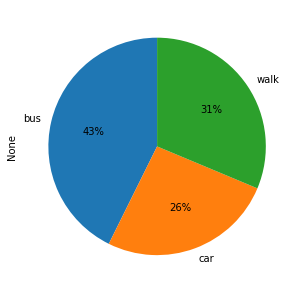

In [55]:
s = voy.sum()[sorted(set(sm_gdl.mode_nests.index) - set(sm_gdl.mode_nests['root']))]
plot = s.plot(
    kind='pie',
    autopct='%1.0f%%',
    shadow=False,
    startangle=90, figsize=[5, 5])
plot.set_aspect('equal')


##### Viajes totales por modalidad

In [56]:
s.head()

bus     422628.328848
car     257667.854291
walk    310021.816861
dtype: float64

##### Exportacion de las matrices de utlidad, matrices de probabilidad de distribucion modal y distribucion de viajes por modalidad

In [57]:
sm_gdl.utilities.to_excel(r'C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/matriz_utilidades.xlsx', index = True)

sm_gdl.probabilities.to_excel(r'C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/matriz_probabilidades.xlsx', index = True)

voy.to_excel (r'C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/distribucion_viajes_modalidad.xlsx', index = True)

##### Exportacion del nuevo SM con la distribucion modal

In [ ]:
sm_gdl.to_zip(training_folder + 'model/base/sm_gdl_modal_split.zip'.format(scen=scenario))

### 5) Asignación a la red 

In [1]:
import sys # for automation and parallelization
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

import sys
sys.path.insert(0, r'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Quetzal Dev/quetzal-master')

from quetzal.model import stepmodel
from quetzal.io import excel
import pandas as pd
if manual:
    %matplotlib inline

import geopandas as gpd

training_folder ='C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/'

SQLalchemy is not installed. No support for SQL output.


##### Lectura del SM con la distribucion modal

In [2]:
sm_gdl = stepmodel.read_zip('C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Modelo GDL basado en paris/model/base/sm_gdl_modal_split.zip'.format(scen=scenario))

zones: 100%|██████████| 37/37 [00:44<00:00,  1.22s/it]                    


In [3]:
sm_gdl.car_los['path'] = sm_gdl.car_los['path'].apply(tuple)
sm_gdl.pt_los['path'] = sm_gdl.pt_los['path'].apply(tuple)
sm_gdl.los['path'] = sm_gdl.los['path'].apply(tuple)

#### Funcion de asignación

In [4]:
sm_gdl.step_assignment(boardings=True, alightings=True, transfers=True, road=True, segmented=False, boarding_links= True)

##### Visualización de las caracterisitcas de los road_links

In [5]:
sm_gdl.road_links.loc[53982]

index                                                        53982
a                                                       1920779582
b                                                       1920779584
length                                                      50.746
geometry         LINESTRING (-11521212.33264352 2366758.4017226...
time                                                       6.81714
walk_time                                                  20.4514
(volume, car)                                                  NaN
(volume, pt)                                                   NaN
Name: 53982, dtype: object

In [6]:
links = sm_gdl.links
links = sm_gdl.links.loc[sm_gdl.links['volume'] > 0]
links['label'] = ''

In [7]:
### Inspeccion de la capacidad maxima de volumen por links
links['volume'].max()

30321.439613117167

In [8]:
sm_gdl.road_links['volume'] = sm_gdl.road_links[('volume', 'pt')]

df = sm_gdl.links
df = df.loc[df['volume'] > 0] # toma solo los links que tienen un flujo mayor a cero

### IMPORTANTE: aqui lo que hace es que toma el DF que contiene el flujo por links

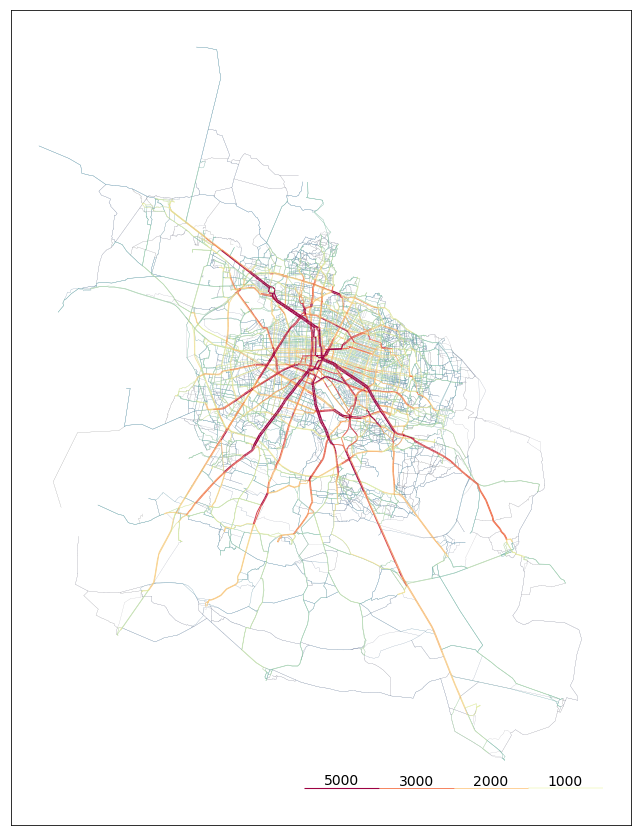

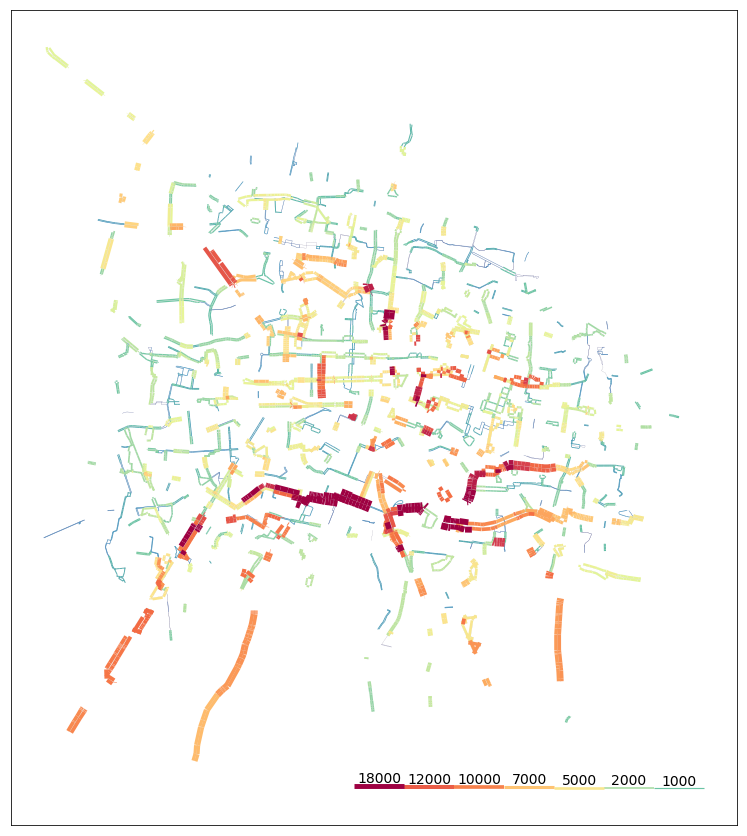

In [66]:
if manual:
    import matplotlib.pyplot as plt
    from syspy.syspy_utils import data_visualization as dv
    spectral = list(reversed(
        ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b',
         '#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']))


### Esto es la gráfica de asignación de viajes en auto a la red vial
    fig, ax = plt.subplots(figsize=[17, 15])
    lv = (5000,3000, 2000, 1000)
    df = sm_gdl.road_links
    df['volume'] = df[('volume', 'car')]
    df = df.dropna(subset=['volume'])

    plot = dv.bandwidth(
        df, value_column='volume', power=0.5, max_value=lv[0], legend_values=lv,
        legend_length=0.5, label_column='label', max_linewidth_meters=100,
        cmap=spectral,
        label_kwargs={'size':14, 'color':'black'}, ax=ax
    )



#### Esto es la asginación a la red de transport público
    lv = (18000,12000,10000, 7000,5000, 2000, 1000)   # esto son la categorizacion del color
    fig, ax = plt.subplots(figsize=[17, 15])
    infra_links = sm_gdl.links.loc[sm_gdl.links.road_length.isnull()]

    sm_gdl.road_links['volume'] = sm_gdl.road_links[('volume', 'pt')]
    df = pd.concat([infra_links, sm_gdl.road_links])
    df['volume'] = df['volume'].fillna(0)
    df = df.loc[df['volume'] > 0]

    plot = dv.bandwidth(
        df, value_column='volume', power=0.5, max_value=lv[0],legend_values=lv,
        legend_length=0.5, label_column='label', max_linewidth_meters=200,
        #geographical_bounds=list(raster_montreal.bounds),
        cmap=spectral,
        label_kwargs={'size':14, 'color':'black'}, ax=ax
    )


##### Visualización del DF con los  volumenes de viajes por link

In [9]:
## Road_ links contiene los volumenes de viaje por tipo de modalidad en cada link
sm_gdl.road_links.head()

,index,a,b,length,geometry,time,walk_time,"(volume, car)","(volume, pt)",volume
0,0,6347554816,1639281613,46.602,"LINESTRING (-11495824.754 2348897.003, -114958...",6.260444,18.781332,NaN,NaN,NaN
1,1,6347554816,6347554804,43.200,"LINESTRING (-11495824.754 2348897.003, -114958...",5.803424,17.410273,NaN,NaN,NaN
2,2,6347554816,6347554799,113.432,"LINESTRING (-11495824.754 2348897.003, -114957...",15.238288,45.714863,NaN,NaN,NaN
3,3,6347554817,6347554804,57.049,"LINESTRING (-11495897.234 2348871.309, -114958...",7.663879,22.991636,NaN,NaN,NaN
4,4,6347554817,1643880278,153.992,"LINESTRING (-11495897.234 2348871.309, -114960...",20.687058,62.061175,NaN,NaN,NaN


##### Visualización del DF de links

In [10]:
# dentro de Links se encuentra la frecuencia de cada link para todos los viajes  y tambien se encuinetra a que ruta corresponde cada link en particular
sm_gdl.links.head()

,index,a,trip_id,link_sequence,departure_time,b,arrival_time,time,route_id,direction_id,...,road_node_list,road_link_list,road_length,geometry,disaggregated_a,disaggregated_b,headway,length,volume,boardings
link_0,0,28,BUSES_GDL001001,1,62.0,28,124.0,62.0,BUSES_GDL001,1,...,"[1920779980, 2129996075, 2339995706, 298824068...","[54742, 84554, 110820, 66929, 457806, 342280]",487.318,"LINESTRING (-11519018.893 2367943.302, -115191...",node_1000000,node_1001089,180,487.318,NaN,NaN
link_1,1,28,BUSES_GDL001001,2,124.0,28,186.0,62.0,BUSES_GDL001,1,...,"[2988240678, 1993270560, 1870646419, 199327992...","[457805, 209333, 273654, 218961]",326.371,"LINESTRING (-11519015.955 2367605.476, -115190...",node_1001089,node_1001200,180,326.371,NaN,NaN
link_2,2,28,BUSES_GDL001001,3,186.0,130,248.0,62.0,BUSES_GDL001,1,...,"[1993279920, 6542850229, 7313230932, 187064638...","[218953, 284459, 219980, 273613, 282918, 45684...",1560.435,"LINESTRING (-11519038.063 2367275.991, -115190...",node_1001200,node_1001306,180,1560.435,3477.474358,3477.474358
link_3,3,130,BUSES_GDL001001,4,248.0,130,310.0,62.0,BUSES_GDL001,1,...,"[4712038824, 8386341496, 6135406360, 613540635...","[954, 456842, 456839, 208146, 478684, 371728, ...",822.072,"LINESTRING (-11518533.062 2366715.024, -115186...",node_1001306,node_1001417,180,822.072,NaN,NaN
link_4,4,130,BUSES_GDL001001,5,310.0,130,372.0,62.0,BUSES_GDL001,1,...,"[3670859704, 3670859632, 1993047919, 471203882...","[61465, 200712, 287613, 966, 968, 977, 428140,...",1343.229,"LINESTRING (-11518231.052 2366475.870, -115185...",node_1001417,node_1001526,180,1343.229,NaN,NaN


In [11]:
sm_gdl.links.volume.sum() # 6 millones

6411244.5464611435

In [12]:
########## PRIMERA APARICION DE VOLUMEN_ROUTE
### Sumatoria agregada con las columnas Route ID y volumen
volumen_route = sm_gdl.links.groupby(['route_id'])["volume"].apply(lambda x : x.astype(float).sum())

In [13]:
# Convertirlo a DF
volumen_route= volumen_route.to_frame()

In [14]:
# generar la columna del route ID
volumen_route['Route'] = volumen_route.index

In [15]:
volumen_route.volume.sum() # Duda para quentin, esto es el totla de viajes a lo largo de todo el DIA?

6411244.546461145

##### Visualizacion del DF de volumenes por ruta

In [16]:
volumen_route.head()

,volume,Route
route_id,,
BUSES_GDL001,105122.177333,BUSES_GDL001
BUSES_GDL002,232666.482138,BUSES_GDL002
BUSES_GDL003,101309.278027,BUSES_GDL003
BUSES_GDL004,113206.900892,BUSES_GDL004
BUSES_GDL005,81824.013920,BUSES_GDL005


####  Resumen de métricas en el TP

In [17]:
import sys
from quetzal.model import stepmodel
import numpy as np
import pandas as pd
import geopandas as gpd
from rasterio import plot
import rasterio
from shapely import geometry
# import visualization


from syspy.skims import skims
from quetzal.io import excel

manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])


In [18]:
var= excel.read_var( file= 'C:/Users/orlan/Documents/UPC/PhD/Papers/Paper 4/Modelo de Demanda GDL/Data/inputs/parameters_gdl_paris.xlsx')
var.head()

category  parameter        
general   parent               base
          bus_speed_factor      0.8
          boarding_cost_acf     300
          boarding_cost_wor     300
          routes_code          base
Name: base, dtype: object

In [19]:
# Visualizacion de las columnas del DF links
sm_gdl.links.columns


Index(['index', 'a', 'trip_id', 'link_sequence', 'departure_time', 'b',
       'arrival_time', 'time', 'route_id', 'direction_id', 'service_id',
       'trip_headsign', 'trip_short_name', 'shape_id', 'agency_id',
       'route_short_name', 'route_long_name', 'route_type', 'road_a', 'road_b',
       'road_node_list', 'road_link_list', 'road_length', 'geometry',
       'disaggregated_a', 'disaggregated_b', 'headway', 'length', 'volume',
       'boardings'],
      dtype='object')

In [20]:
# Visualizacion del tipo de modos en TP (recordar que el DF de links es solo para TP)
sm_gdl.links['route_type']


link_0       bus
link_1       bus
link_2       bus
link_3       bus
link_4       bus
            ... 
link_4583    bus
link_4584    bus
link_4585    bus
link_4586    bus
link_4587    bus
Name: route_type, Length: 4588, dtype: object

In [21]:
try:
    sm_gdl.links['mode'] = sm_gdl.links['mode_' + var['general']['routes_code']] #verify
except KeyError:
    sm_gdl.links['mode'] = sm_gdl.links['route_type']

from syspy.assignment.raw import fast_assign as assign
rl = sm_gdl.road_links[['length']]
modes = list(set(sm_gdl.links['mode']))

for mode in modes:
    l = sm_gdl.links.loc[sm_gdl.links['mode'] == mode].copy()
    l['dummy'] = 1
    rl[mode] = np.clip(assign(l['dummy'], l['road_link_list']), 0, 1)
    rl[mode] = rl[mode] * rl['length']

routes = list(set(sm_gdl.links['route_id']))
for route in routes:
    l = sm_gdl.links.loc[sm_gdl.links['route_id'] == route].copy()
    l['dummy'] = 1
    rl[route] = np.clip(assign(l['dummy'], l['road_link_list']), 0, 1)
    rl[route] = rl[route] * rl['length']

route_sum = rl[routes].sum() ## Que indica esto ?
mode_sum = rl[modes].sum()   ## Que indica esto?


### Stacks

In [22]:
model_to_day = var['post_parameters']['model_to_day']
model_duration = var['post_parameters']['model_duration'] # hour (supongo que se refiere solo a la hora pico, dado que el valor en el DF de parametes es 1)
vehicle_disponibility = var['post_parameters']['vehicle_disponibility']
mobility_rate = var['post_parameters']['mobility_rate']
vehicle_capacities = var['vehicle_capacities'].to_dict()

In [23]:
sm_gdl.links['per_hour'] = 3600 / sm_gdl.links['headway']  # estos SON LOS vehiculos por hora que pasan por detemrinado link
sm_gdl.links['vehicle_capacity'] = sm_gdl.links['mode'].apply(vehicle_capacities.get)  # aqui une las capacidades de vehiculos al DF de links
sm_gdl.links['capacity'] = (sm_gdl.links['vehicle_capacity'] * sm_gdl.links['per_hour']).astype(int)  # IMPORANTE: aqui lo que hace es que le asgina al LINk una capacidad, dado la frecuencia de paso de vehiculos por hora y la capacidad de los vehiculos

In [24]:
sm_gdl.links['vehicles'] = sm_gdl.links['time'] / sm_gdl.links['headway']  # Cantidad de vehiculos que pasan por link por hora
sm_gdl.links['km'] = sm_gdl.links['length'] / 1000  # Distancia en km

sm_gdl.links['pt'] = sm_gdl.links.volume

In [25]:
sm_gdl.links['vehicle_km'] = model_duration * sm_gdl.links['per_hour'] * sm_gdl.links['km'] # esto son la cantidad de kilometros que recorre las rutas en cada link por hora  (esto podria servir para hacer estimaciones de emisiones por zona)

sm_gdl.links['seat_km'] = model_duration * sm_gdl.links['per_hour'] * sm_gdl.links['km']* sm_gdl.links['capacity']
sm_gdl.links['voy_km'] = model_duration * sm_gdl.links['per_hour'] * sm_gdl.links['km']* sm_gdl.links['volume']

In [26]:
summary = sm_gdl.links.groupby(['route_id']).agg(
    {
        'boardings': 'sum',
        'pt': 'max',
        'vehicles': 'sum',
        'length': 'sum',
        'time': 'sum',
        'vehicle_km': 'sum',
        'seat_km': 'sum',
        'voy_km': 'sum',
        'headway': 'max',
        'capacity': 'max',
        'mode': 'first',

    }
)
sm_gdl.stack_routes = summary.stack()


##### Visualizacion del nuevo DF, resumen de caracteristicas de las rutas

In [27]:
### ES POR HORA!
summary.head()

,boardings,pt,vehicles,length,time,vehicle_km,seat_km,voy_km,headway,capacity,mode
route_id,,,,,,,,,,,
BUSES_GDL001,78614.303968,6604.888551,52.355556,71944.758,9424.0,1438.89516,3021679.836,1.210989e+06,180,2100,bus
BUSES_GDL002,95875.072294,11216.526637,37.200000,55800.746,6696.0,1116.01492,2343631.332,3.070902e+06,180,2100,bus
BUSES_GDL003,39611.877389,5275.548946,38.577778,63325.790,6944.0,1266.51580,2659683.180,1.416119e+06,180,2100,bus
BUSES_GDL004,48901.925827,11051.464710,26.177778,35284.331,4712.0,705.68662,1481941.902,1.818178e+06,180,2100,bus
BUSES_GDL005,43399.217867,7256.655311,44.777778,59659.236,8060.0,1193.18472,2505687.912,9.946018e+05,180,2100,bus


In [28]:
sm_gdl.stack_routes.index.names = ['route_id', 'indicator']
sm_gdl.stack_routes.name = 'aggregated'

In [29]:
lines = summary.copy()
lines['design'] = lines['voy_km'] / (lines['seat_km'] * (lines['pt'] / lines['capacity']))
lines['empty_seats'] = np.round(1 - lines['design'], 2)
lines['boardings'] = np.round(summary['boardings'] * model_to_day, -3).astype(int)
lines['vehicle_km'] = np.round(summary['vehicle_km']).astype(int) # la original lo tenia * model day que vale 5, por que lo quiere multiplicar por eso?, yo lo quite y represntará los KM recorridos por hora por todas las unidades de cada ruta
        # lines['vehicle_km'] = np.round(summary['vehicle_km'] * model_to_day, -2).astype(int),   ES COMO ESTABA ORIGINAL
lines['seat_km'] = np.round(summary['seat_km'] * model_to_day, -3).astype(int)
lines['voy_km'] = np.round(summary['voy_km'] * model_to_day, -3).astype(int)
lines['max_load'] = np.round(summary['pt'].fillna(0), -2).astype(int) # cantidad total de personas por hora en cada ruta redondeada hacia arriba
lines['vehicles'] = np.floor(lines['vehicles'] / vehicle_disponibility).astype(int) + 1
lines['minutes'] = np.round(lines['time'] / (2*60)).astype(int)  # Duracion de la ruta

## IMPORTANTE: la columna de capacity indica la cantidad total de personal que pueden transitar por esa linea, esto se generar derivado de la cantidad de vehiculos que pasa por esa ruta y la capacidad de estos
# Por otra parte, max load  es la cantidad TOTAL de personas que abordan una linea en particuar redondeada, su magnitud como se podrá observar es muy similar a pt simplemente que redonbdeada hacia arriba

In [30]:
# Cálculo de las capacidades  y costos por unidad recorrida de cada linea (el costo por unidad recorrida esta vinculado casi exclusivamente a los gastos del energético que se use como propulsión, no toma en consideración la amortización de la compra de la unidad, salarios entre otros, es solo el costo opertaivo de las unidades necesarias para cada linea
vehicle_capacities = var['vehicle_capacities']
vehicle_capacities = int(vehicle_capacities) # hay que convertirla a int para poder usarla como constante en la multiplicacion para la capacidad


####### REVISAR, ESTA INCORRECTO.ESTA ERA MI VERSSION
#  lines['capacity'] =  lines['vehicles'] * vehicle_capacities   # capacidad real de la linea (pasajeros)

# costo de operacion por hora (USD/hora)
unit_distance_cost = var['post_parameters'] ['unit_distance_cost']
lines['distance_cost'] =  lines['vehicle_km'] *  unit_distance_cost   # costo por operacion de la flotilla, solo aspecto energético (USD/hora)

In [31]:
### Emisiones por operación (kg de CO2 /hora)
emision_km = var['post_parameters'] ['emision_km']
lines['emisions'] =  (lines['vehicle_km'] * emision_km) /1000 # emisiones de CO2 por hora de operacion de cada linea


In [32]:
## Calculo de la saturacion por linea (si es igual o menor a 1 la linea aguanta bien, si es mayor a 1 hay un deficit de capacidad en la linea)
lines['km'] = np.round(route_sum/ (2*1000)).astype(int) # esto es la longitud de cada linea
lines['saturation'] = np.round( lines['max_load'] / lines['capacity'], 1 )
# Saturación entre más peor, para que la capacidad de la línea sea la indicadqa el valor de saturation tiene que ser = 1. Mayor a esto es la cantidad de veces que está saturada la línea en relación a su capacidad total

##### Abordajes completos ¿¿??

In [117]:
lines.boardings.sum()

13877000

##### Emisiones totales de la red  (kg CO2/hora)

In [106]:
lines.emisions.sum()

28399.409000000003

##### Costo de operación por hora de la red (USD/hora)

In [107]:
lines.distance_cost.sum()

19974.114

##### Capacidad total de la red

In [108]:
lines.capacity.sum()

81900

##### Visualización del nuevo DF LINES
###### el DF de lines ahora contiene un resumen de una gran cantidad de datos referentes a la red de TP

In [58]:
lines.head() # Gran parte de los datos esta representado para una hora de operacion de cad ruta
# vehicules es el numero de unidades que se requiere por ruta, length es la longitud total en metros de recorrido en una por los vehiculos de esa ruta
# time es el tiempo del recorrido de todas las unidades por una hora etc...

,boardings,pt,vehicles,length,time,vehicle_km,seat_km,voy_km,headway,capacity,mode,design,empty_seats,max_load,minutes,alv
route_id,,,,,,,,,,,,,,,,
BUSES_GDL001,393000,6604.888551,66,71944.758,9424.0,1439,15108000,6055000,180,6930,bus,0.127422,0.87,6600,79,NaN
BUSES_GDL002,479000,11216.526637,47,55800.746,6696.0,1116,11718000,15355000,180,4935,bus,0.245323,0.75,11200,56,NaN
BUSES_GDL003,198000,5275.548946,49,63325.790,6944.0,1267,13298000,7081000,180,5145,bus,0.211944,0.79,5300,58,NaN
BUSES_GDL004,245000,11051.464710,33,35284.331,4712.0,706,7410000,9091000,180,3465,bus,0.233134,0.77,11100,39,NaN
BUSES_GDL005,217000,7256.655311,56,59659.236,8060.0,1193,12528000,4973000,180,5880,bus,0.114870,0.89,7300,67,NaN


##### Total de uniades de buses requeridas para la frecuencia y lineas totales propuestas
###### Esto no significa que es el número final de buses requeridos, dado las capacidaddes su cnatidad y la demanda pueden que sean menos buses los requeridos o más

In [109]:
lines.vehicles.sum()

1992

##### Km recorridos por toda la flota por hora

In [110]:
lines.vehicle_km.sum()


41099

##### Visualización del DF LINES

In [62]:
### el DF de lines sigue acumulando variables, visualización
lines.head()

,boardings,pt,vehicles,length,time,vehicle_km,seat_km,voy_km,headway,capacity,mode,design,empty_seats,max_load,minutes,alv,km,saturation
route_id,,,,,,,,,,,,,,,,,,
BUSES_GDL001,393000,6604.888551,66,71944.758,9424.0,1439,15108000,6055000,180,6930,bus,0.127422,0.87,6600,79,NaN,32,1.0
BUSES_GDL002,479000,11216.526637,47,55800.746,6696.0,1116,11718000,15355000,180,4935,bus,0.245323,0.75,11200,56,NaN,27,2.3
BUSES_GDL003,198000,5275.548946,49,63325.790,6944.0,1267,13298000,7081000,180,5145,bus,0.211944,0.79,5300,58,NaN,30,1.0
BUSES_GDL004,245000,11051.464710,33,35284.331,4712.0,706,7410000,9091000,180,3465,bus,0.233134,0.77,11100,39,NaN,16,3.2
BUSES_GDL005,217000,7256.655311,56,59659.236,8060.0,1193,12528000,4973000,180,5880,bus,0.114870,0.89,7300,67,NaN,27,1.2


##### Abordajes totales en todas las lineas

In [111]:
lines.boardings.sum() # 14 millones de abordajes, esto dado que el algoritmo de Dijstrtra no se esta ejecutando de una manera realista ya que hay viajes que requiren 7, 10 o más transferencias no nos podemos fiar de este numerp en concreto

13877000

#####  Viajes totales en TP en hora pico

In [112]:
lines.pt.sum()
# el DF de lines dentro de la columna de PT contiene los viajes en hora pico de cada ruta

394069.09079648816

In [33]:
try:
    lines.index = [int(i) for i in lines.index]
except ValueError: # base
    pass
lines.sort_index(inplace=True)
lines.index.name = 'line'
lines['voy_to_seat_km'] = lines['voy_km'] / lines['seat_km'] # Agrega una nueva columna
data = lines[
    [
        'mode', 'km', 'minutes',  'vehicles','vehicle_km',
        'voy_km', 'seat_km', 'empty_seats',
        'headway', 'capacity',
        'max_load', 'saturation', 'boardings'
    ]
].set_index('mode', append=True).swaplevel().loc[modes]


total_boardings = data['boardings'].sum() # crea esta nueva variable que es el total de abordajes


##### Visualizacion del DF de lines, agrupa los resultados más relevantes para el TP


In [114]:
# lines['route_id'] = lines.index  por si quiero agregar una columna extra igual a la del inidice que contiene el route_id
lines.head()

,boardings,pt,vehicles,length,time,vehicle_km,seat_km,voy_km,headway,capacity,mode,design,empty_seats,max_load,minutes,distance_cost,emisions,km,saturation,voy_to_seat_km
line,,,,,,,,,,,,,,,,,,,,
BUSES_GDL001,393000,6604.888551,66,71944.758,9424.0,1439,15108000,6055000,180,2100,bus,0.127422,0.87,6600,79,699.354,994.349,32,3.1,0.400781
BUSES_GDL002,479000,11216.526637,47,55800.746,6696.0,1116,11718000,15355000,180,2100,bus,0.245323,0.75,11200,56,542.376,771.156,27,5.3,1.310377
BUSES_GDL003,198000,5275.548946,49,63325.790,6944.0,1267,13298000,7081000,180,2100,bus,0.211944,0.79,5300,58,615.762,875.497,30,2.5,0.532486
BUSES_GDL004,245000,11051.464710,33,35284.331,4712.0,706,7410000,9091000,180,2100,bus,0.233134,0.77,11100,39,343.116,487.846,16,5.3,1.226856
BUSES_GDL005,217000,7256.655311,56,59659.236,8060.0,1193,12528000,4973000,180,2100,bus,0.114870,0.89,7300,67,579.798,824.363,27,3.5,0.396951


#### Exportacion del SM con la asignación a la red y del DF que contiene los volumenes por link

In [42]:
sm_gdl.to_zip(training_folder + 'model/base/asigned.zip', omitted_attributes=['pt_los', 'car_los'])

stack_routes: 100%|██████████| 36/36 [00:38<00:00,  1.06s/it]            


In [34]:
lines.to_excel (r'C:/Users/orlan/Documents/UPC/PhD/Redación Tesis/Resultados/resumen_metricas_rutas_quentin.xlsx', index = True)

#### FALTA: Visualización espacial, emisiones por zonas, costos operativos de cada linea, calculo del punto de equilibrio de la linea de transsporte
